# **Prediksi Kurs Jual EUR/IDR**

---

# **Pendahuluan**

## **Latar Belakang**
Kurs jual EUR/IDR merupakan salah satu indikator penting dalam perekonomian, khususnya bagi perusahaan yang bergerak di sektor ekspor-impor, investasi asing, dan transaksi keuangan internasional. Fluktuasi kurs yang dipengaruhi oleh faktor ekonomi global, kebijakan moneter, dan kondisi pasar domestik sering kali menimbulkan ketidakpastian bagi pelaku usaha dan individu. Oleh karena itu, kemampuan untuk memprediksi kurs jual EUR/IDR secara akurat dapat memberikan keuntungan strategis dalam pengambilan keputusan keuangan.

Proyek ini bertujuan untuk membangun model prediksi kurs jual EUR/IDR menggunakan data harian yang diperoleh dari Bank Indonesia (BI). Dengan memanfaatkan teknologi pemodelan time series, hasil prediksi diharapkan mampu membantu perusahaan, lembaga keuangan, dan individu dalam merencanakan strategi keuangan yang lebih baik.

## **Pernyataan Masalah**
1. Bagaimana membangun model prediksi kurs jual EUR/IDR yang akurat berdasarkan data historis?

## **Tujuan**
Memprediksi kurs jual EUR/IDR dengan akurasi tinggi, sehingga dapat mendukung pengambilan keputusan keuangan yang lebih terarah bagi berbagai sektor.

---

# **Metodologi Penelitian**

## **Pemahaman Data**
Data yang digunakan adalah kurs jual EUR/IDR harian dari Bank Indonesia selama periode 2020 hingga 2023. Data ini mencakup pergerakan harian kurs, yang dianalisis untuk mengidentifikasi pola, tren, dan fluktuasi. Informasi tersebut digunakan untuk membangun model prediksi time series yang mampu memberikan estimasi nilai kurs di masa mendatang.


Import Libary yang dibutuhkan

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Membaca file csv yang sudah saya upload di github

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/alihasan313/psd/main/Kurs-Transaksi-EUR.csv', sep=';')
df

,Nilai,Kurs Jual,Tanggal
0,1,17228.30,12/29/2023
1,1,17108.34,12/28/2023
2,1,17130.87,12/27/2023
3,1,17093.68,12/22/2023
4,1,17093.95,12/21/2023
...,...,...,...
985,1,15621.09,01/08/2020
986,1,15658.84,01/07/2020
987,1,15666.80,01/06/2020
988,1,15615.39,01/03/2020


In [68]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nilai      990 non-null    int64  
 1   Kurs Jual  990 non-null    float64
 2   Tanggal    990 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.3+ KB


,Nilai,Kurs Jual
count,990.00,990.00
mean,1.00,16516.18
std,0.00,750.22
min,1.00,14680.41
25%,1.00,16141.98
50%,1.00,16537.47
75%,1.00,17106.47
max,1.00,18416.33


| Atribut   | Deskripsi                                              |
|-----------|--------------------------------------------------------|
| Tanggal   | Tanggal dengan interval harian.                        |
| Nilai     | Nilai tukar EUR/IDR pada tanggal tersebut.             |
| Kurs Jual | Kurs jual EUR/IDR yang ditetapkan oleh Bank Indonesia. |


#### **Konversi Tanggal** <BR>
Untuk memudahkan proses analisis data berbasis waktu, atribut tanggal diproses dengan mengubahnya menjadi tipe data datetime dan menjadikannya sebagai index.

In [69]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')  

df.set_index('Tanggal', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 990 entries, 2020-01-02 to 2023-12-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nilai      990 non-null    int64  
 1   Kurs Jual  990 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 23.2 KB


#### **Mengencek data null pada data**

In [70]:
print(df.isnull().sum())

Nilai        0
Kurs Jual    0
dtype: int64


Tidak ada missing value

#### **Mengencek Outlier**

In [71]:
from scipy import stats

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = stats.zscore(data[column])
    outliers = data[abs(z_scores) > threshold]

    return outliers
outliers_terakhir_z = detect_outliers_zscore(df, 'Kurs Jual')
print("Outliers di kolom Terakhir berdasarkan Z-Score:")
print(outliers_terakhir_z)


Outliers di kolom Terakhir berdasarkan Z-Score:
Empty DataFrame
Columns: [Nilai, Kurs Jual]
Index: []


Mengecek menggunakan Z-score<br> dapat dilihat bahwa atribut barang tidak memiliki outlier.

#### **Visualisai data**

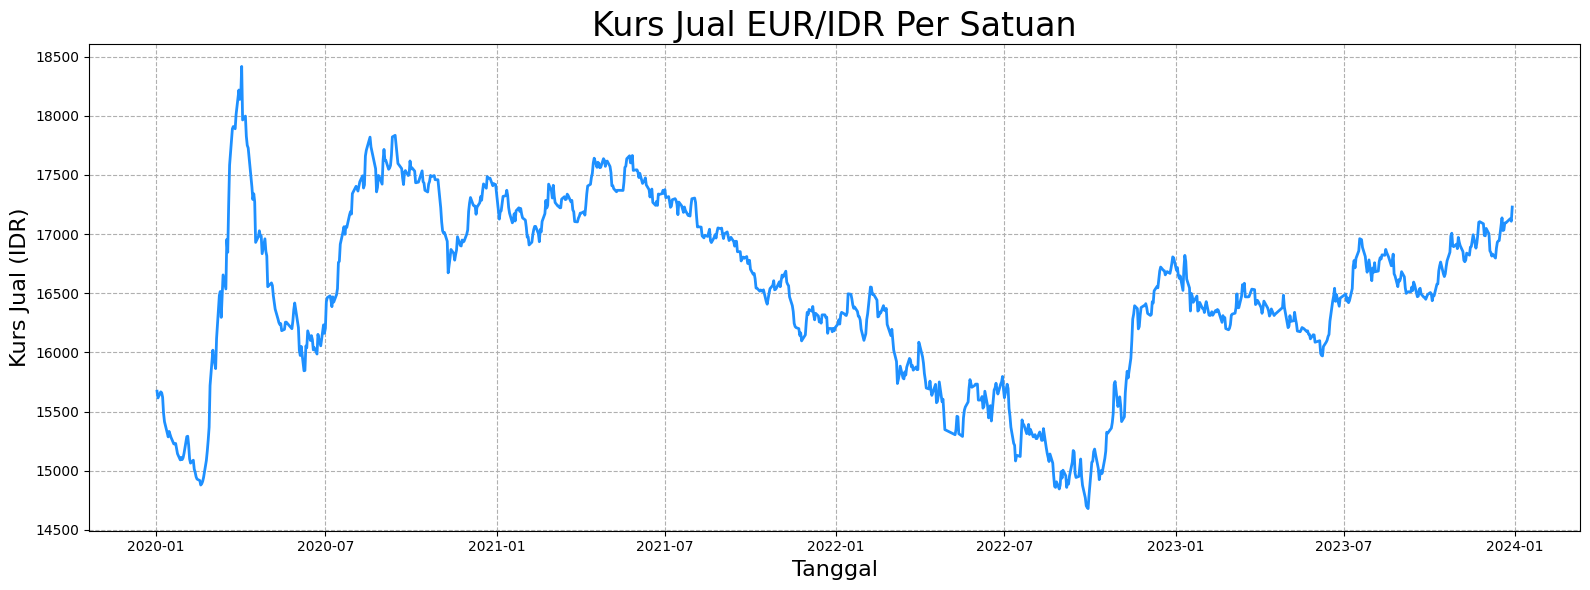

In [72]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Kurs Jual'], color='dodgerblue', linewidth=2)
plt.title('Kurs Jual EUR/IDR Per Satuan', fontsize=24)
plt.xlabel('Tanggal', fontsize=16,)
plt.ylabel('Kurs Jual (IDR)', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


---

### **Prapemrosesan Data**




#### **Normalisasi**

In [73]:
def normalize(df):
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(np_data_scaled, columns=df.columns, index=df.index)
    
    pd.set_option('display.float_format', '{:.4f}'.format)
    
    return normalized_df, scaler

normalized_df, scaler = normalize(df)
# print(normalized_df)


#### **Sliding Window**

In [74]:
def sliding_window(data, lag):
    series = data['Kurs Jual']
    result = pd.DataFrame()

    for l in lag:
        result[f'xt-{l}'] = series.shift(l)
    
    result['xt'] = series.shift(0)
    result = result.dropna()  

    result.index = series.index[lag[-1]:] 
    return result

windowed_data = sliding_window(df, [1, 2, 3])
windowed_data = windowed_data[['xt', 'xt-1', 'xt-2', 'xt-3']]

pd.set_option('display.float_format', '{:.2f}'.format)
windowed_data

,xt,xt-1,xt-2,xt-3
Tanggal,,,,
2020-01-07,15658.84,15666.80,15615.39,15672.34
2020-01-08,15621.09,15658.84,15666.80,15615.39
2020-01-09,15486.60,15621.09,15658.84,15666.80
2020-01-10,15414.92,15486.60,15621.09,15658.84
2020-01-13,15320.89,15414.92,15486.60,15621.09
...,...,...,...,...
2023-12-21,17093.95,17034.36,17029.75,17137.00
2023-12-22,17093.68,17093.95,17034.36,17029.75
2023-12-27,17130.87,17093.68,17093.95,17034.36


| Variabel | Deskripsi                                         |
|----------|---------------------------------------------------|
| `xt`     | Nilai Kurs Jual pada bulan tertentu.               |
| `xt-1`   | Nilai Kurs Jual pada bulan sebelumnya (t-1).       |
| `xt-2`   | Nilai Kurs Jual dua bulan sebelumnya (t-2).        |
| `xt-3`   | Nilai Kurs Jual tiga bulan sebelumnya (t-3).       |


#### **Membagi Data**

In [75]:
def split_data(data, target, train_size):
    split_index = int(len(data) * train_size)

    x_train = data[:split_index]
    y_train = target[:split_index]
    x_test = data[split_index:]
    y_test = target[split_index:]

    return x_train, y_train, x_test, y_test

input_df = windowed_data[['xt-1', 'xt-2', 'xt-3']]
target_df = windowed_data[['xt']]

x_train, y_train, x_test, y_test = split_data(input_df, target_df, 0.8)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (789, 3)
y_train shape: (789, 1)
X_test shape: (198, 3)
y_test shape: (198, 1)


Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji performa model setelah dilatih. Pembagian ini memastikan bahwa model tidak hanya mengingat data yang dilatih, tetapi juga dapat menggeneralisasi dan memberikan prediksi yang baik pada data yang belum pernah dilihat sebelumnya.


---
### **Pemodelan**



#### **Metrik Evaluasi Model Linear Regression**


#### **Linier Regression**

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

Hasil Prediksi Dari Linear Regression
Mean Squared Error (MSE): 4251.856693324774
Root Mean Squared Error (RMSE): 65.2062626848432
Mean Absolute Percentage Error (MAPE): 0.3054685457072373  %


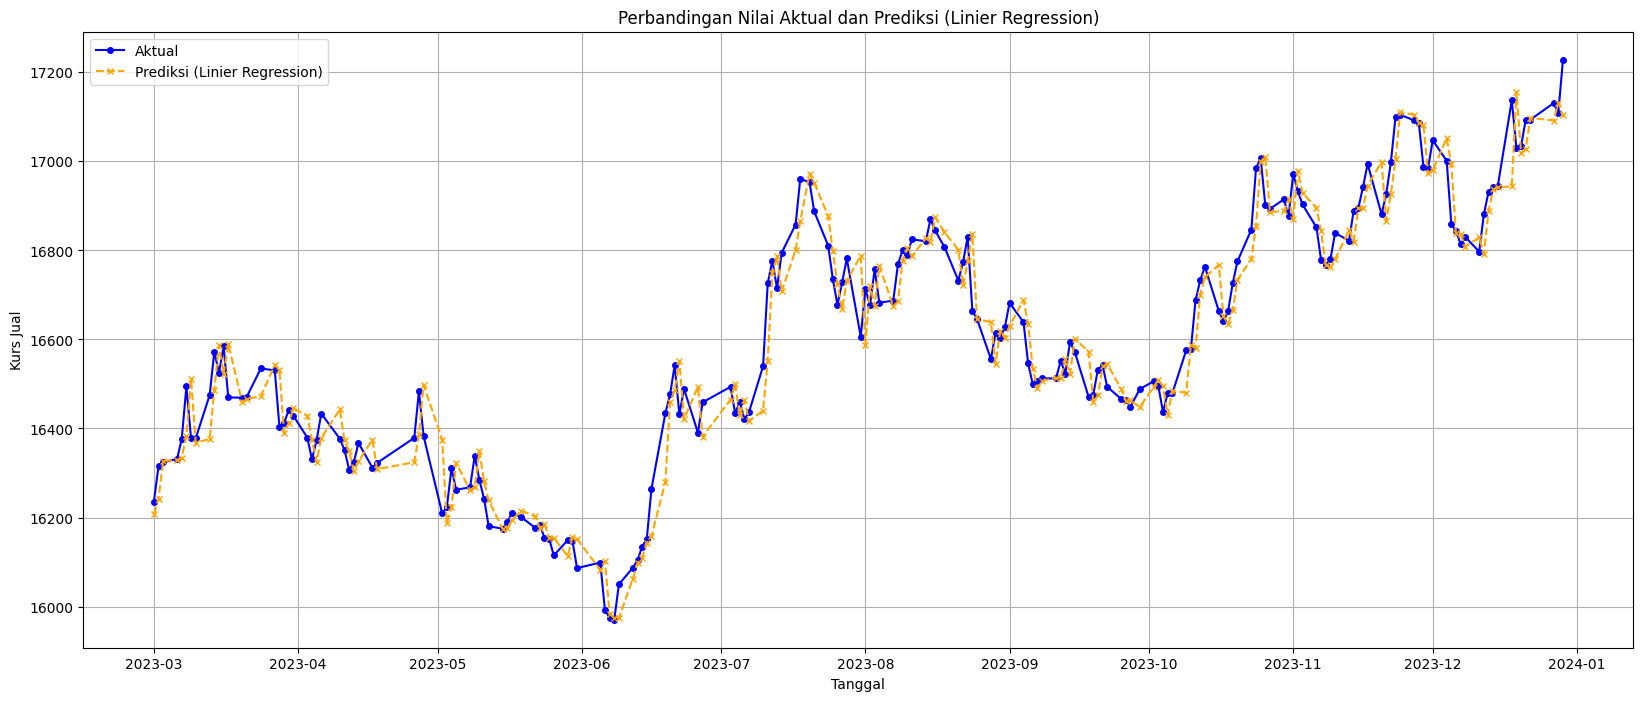

In [77]:
y_pred = linear_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Hasil Prediksi Dari Linear Regression")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape * 100, " %")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index,y_test.values,label='Aktual',color='blue',marker='o',linestyle='-',markersize=4)
plt.plot(y_test.index,y_pred,label='Prediksi (Linier Regression)',color='orange',marker='x',linestyle='--',markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi (Linier Regression)')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.legend()
plt.grid()
plt.show()



#### **Support Vector Regression(SVR)**

SVR:
Mean Squared Error (MSE): 4350.631644835446
Root Mean Squared Error (RMSE): 65.95931810468818
Mean Absolute Percentage Error (MAPE): 0.31205507668152843 %


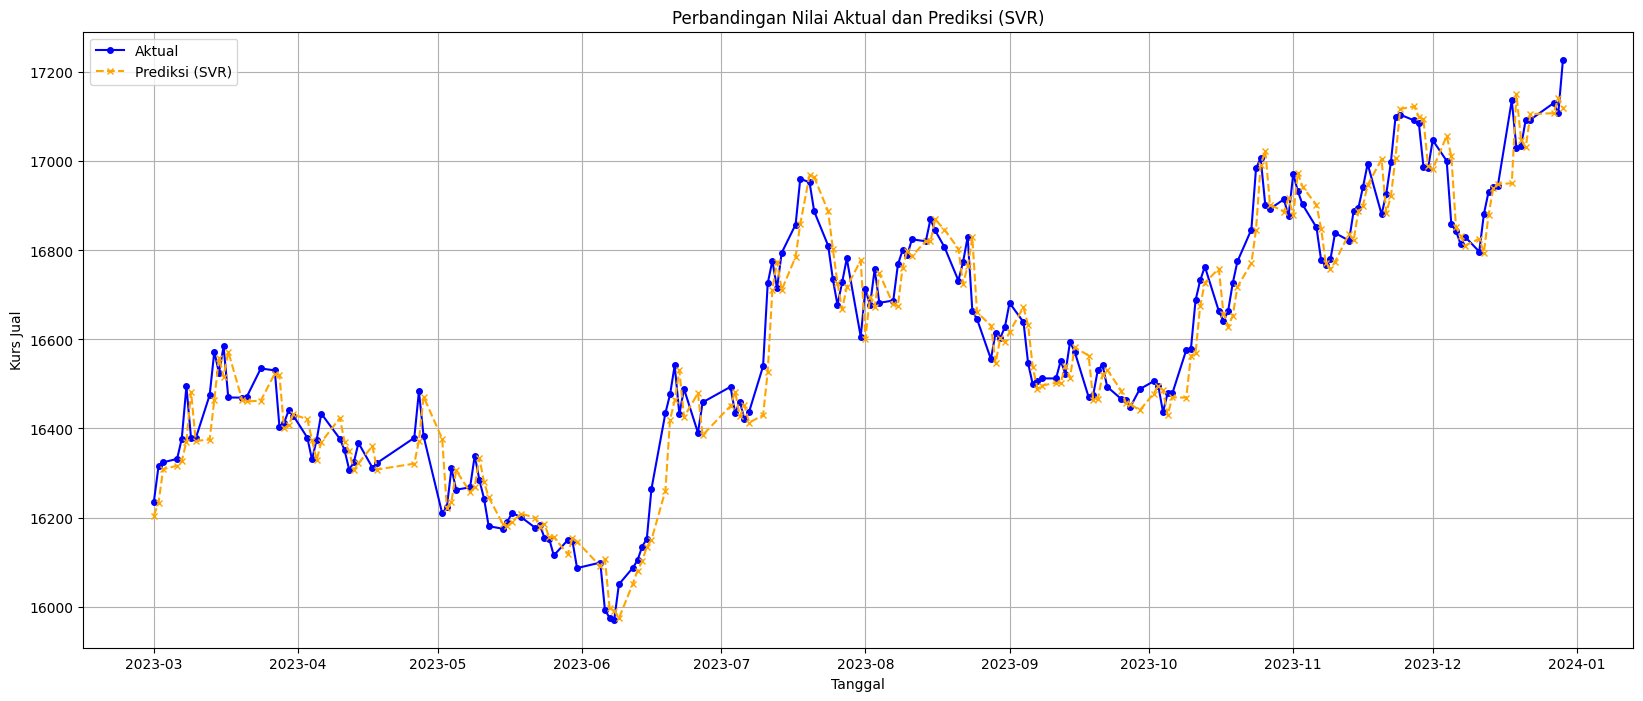

In [78]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
x_test_scaled = scaler_x.transform(x_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(x_train_scaled, y_train_scaled.ravel())

y_pred_scaled = svr_model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SVR:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape * 100, "%")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index,y_test.values,label='Aktual',color='blue',marker='o',linestyle='-',markersize=4)
plt.plot(y_test.index,y_pred,label='Prediksi (SVR)',color='orange',marker='x',linestyle='--',markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi (SVR)')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.legend()
plt.grid()
plt.show()

#### **Long Short-Term Memory(LSTM)**

Epoch 1/100


e:\laragon\bin\python\python-3.10\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2433
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0735
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012  
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013  
Epoc

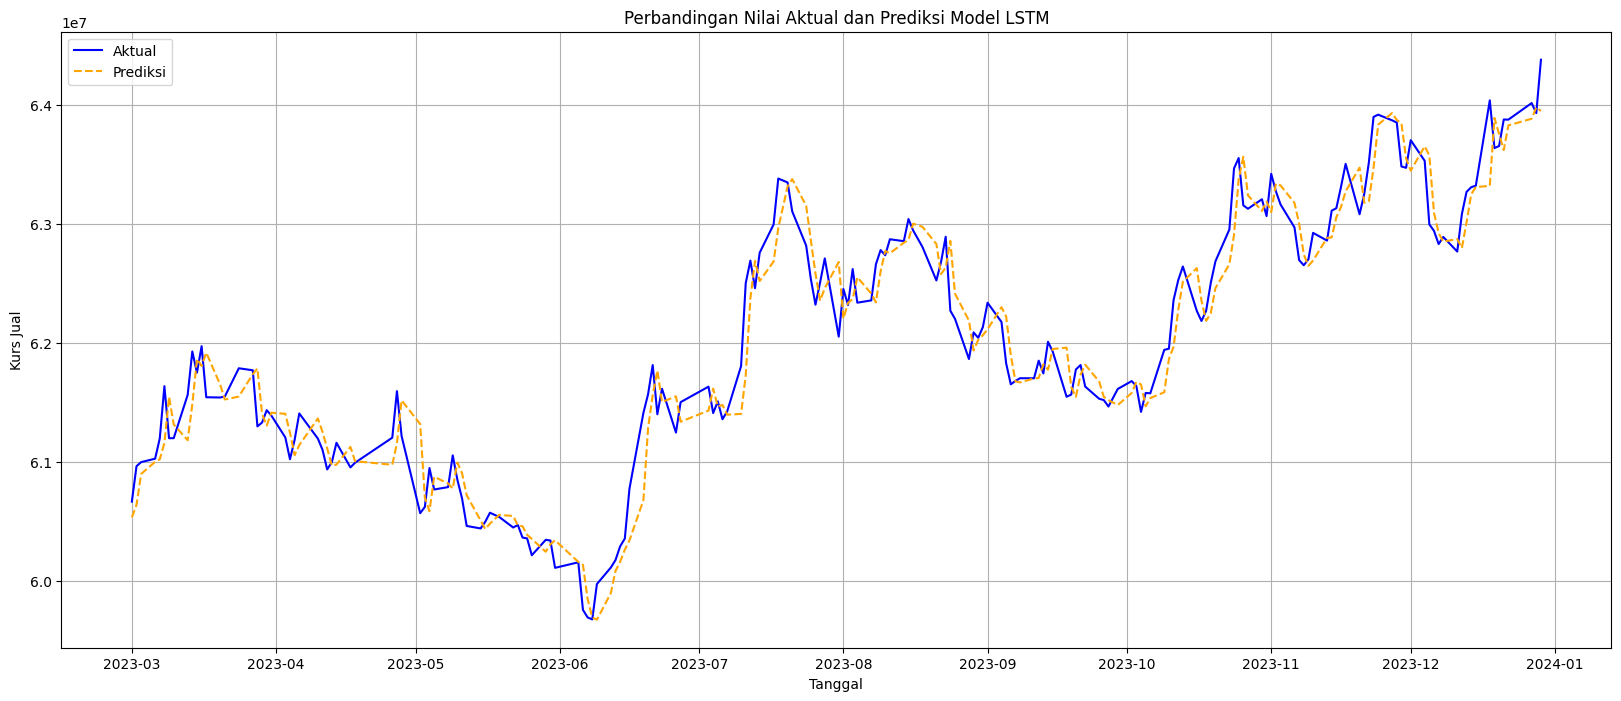

In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM # type: ignore
from tensorflow.keras.layers import Dense # type: ignore


scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_scaled.shape[1], x_train_scaled.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_scaled, y_train_scaled, epochs=100, batch_size=32)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("LSTM:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape * 100, "%")

plt.figure(figsize=(20, 8))
y_test_reshaped = np.hstack([y_test.values.reshape(-1, 1), np.zeros((len(y_test), 1))])
plt.plot(y_test.index, scaler_y.inverse_transform(y_test_reshaped)[:, 0], label='Aktual', color='blue', linestyle='-', markersize=4)
y_pred_reshaped = np.hstack([y_pred.reshape(-1, 1), np.zeros((len(y_pred), 1))])
plt.plot(y_test.index, scaler_y.inverse_transform(y_pred_reshaped)[:, 0], label='Prediksi', color='orange', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.grid(True)
plt.legend()
plt.show()


#### **Bagging Regressor**


e:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\ensemble\_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Bagging Regressor with Linear Regression:
Mean Squared Error (MSE): 4260.920407960348
Root Mean Squared Error (RMSE): 65.27572602400028
Mean Absolute Percentage Error (MAPE): 0.3060850747190919  %


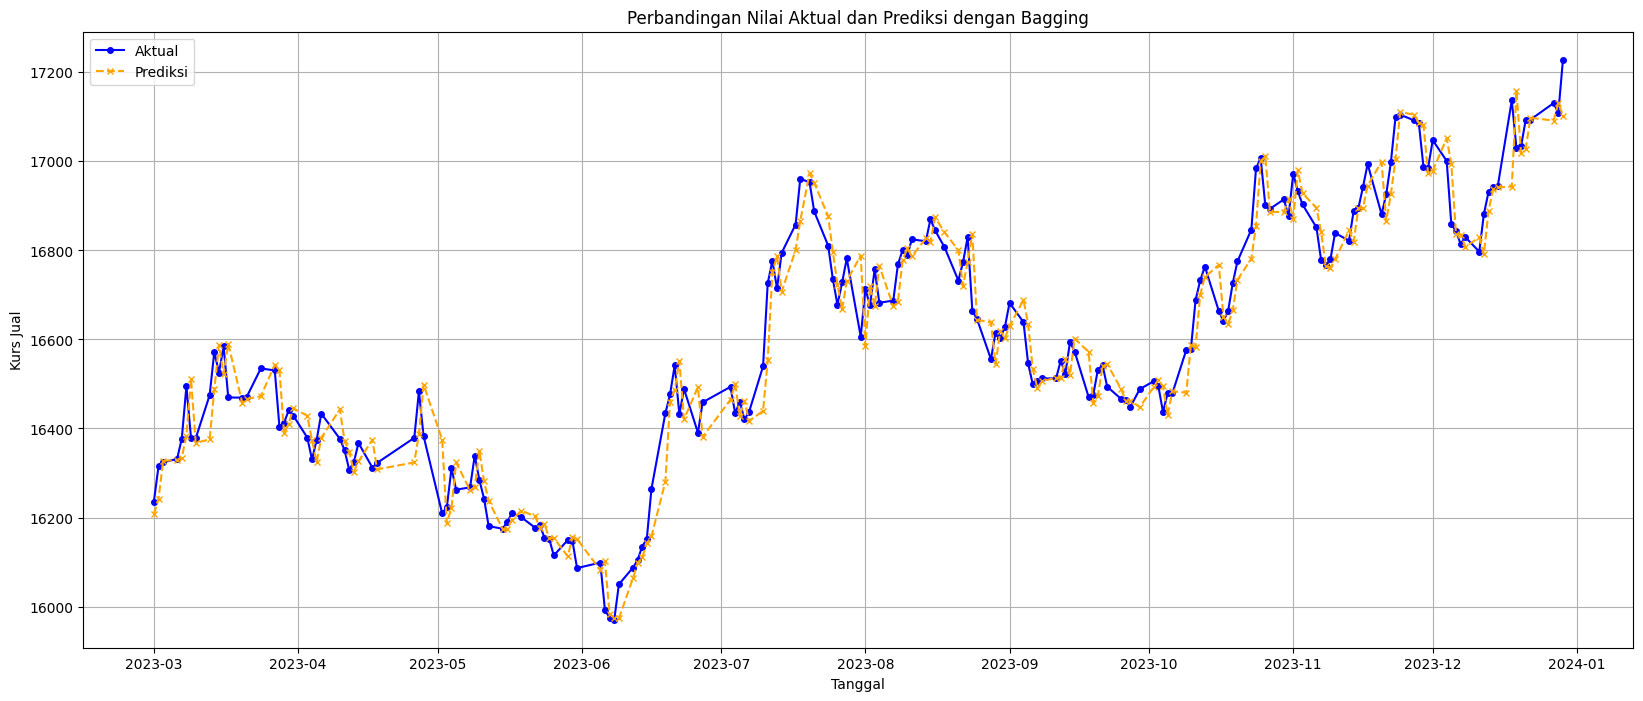

In [80]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

base_model = LinearRegression()
bagging_model = BaggingRegressor(base_model, n_estimators=50, random_state=42)

bagging_model.fit(x_train, y_train)

y_pred_bagging = bagging_model.predict(x_test)

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
mape_bagging = mean_absolute_percentage_error(y_test, y_pred_bagging)

print("Bagging Regressor with Linear Regression:")
print("Mean Squared Error (MSE):", mse_bagging)
print("Root Mean Squared Error (RMSE):", rmse_bagging)
print("Mean Absolute Percentage Error (MAPE):", mape_bagging  *100, " %")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index, y_test, label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, y_pred_bagging, label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi dengan Bagging')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.grid(True)
plt.legend()
plt.show()  


### **Evaluasi**

#### **Grid Search**

In [81]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def grid_search(input_df, target_df, splits, estimators, bootstrap, max_samples):
    best_rmse = float('inf')
    best_params = None
    i = 0
    for split in splits:
        x_train, y_train, x_test, y_test = split_data(input_df, target_df, split)
        for estimator in estimators:
            for bootstrap in bootstraps:
                for max_sample in max_samples:
                    base_model = LinearRegression()
                    bagging_model = BaggingRegressor(estimator=base_model, n_estimators=estimator, bootstrap=bootstrap, max_samples=max_sample)
                    bagging_model.fit(x_train, y_train.values.ravel())
                    y_pred = bagging_model.predict(x_test)
                    i+=1
                    current_rmse = rmse(y_test, y_pred)
                    if current_rmse < best_rmse:
                        best_rmse = current_rmse
                        best_mse = mean_squared_error(y_test, y_pred)
                        best_mape = mean_absolute_percentage_error(y_test, y_pred)
                        best_model = bagging_model
                        best_params = {'estimator': estimator, 'bootstrap': bootstrap, 'train_sample': split, 'max_sample': max_sample}
                        y_test = y_test
                        y_pred = y_pred
    return best_params, best_rmse, best_mse, best_mape, best_model, y_test, y_pred

splits = [0.7, 0.75, 0.8, 0.85, 0.9]
estimators = [10, 20, 50, 100]
bootstraps = [True, False]
max_samples = [0.8, 0.9, 1.0]
best_params, best_rmse, best_mse, best_mape, best_model, y_test, y_pred = grid_search(input_df, target_df, splits, estimators, bootstraps, max_samples)

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
print(f'Best MSE: {best_mse}')
print(f'Best MAPE: {best_mape  * 100 } %')
print(f'Best Model: {best_model}')

Best parameters: {'estimator': 10, 'bootstrap': False, 'train_sample': 0.9, 'max_sample': 0.9}
Best RMSE: 60.991816032952
Best MSE: 3720.001622997461
Best MAPE: 0.27514424448972674 %
Best Model: BaggingRegressor(bootstrap=False, estimator=LinearRegression(), max_samples=0.9)


# **Dampak Hasil Analisis**

Hasil prediksi kurs jual EUR/IDR dapat memberikan dampak positif bagi berbagai sektor, terutama dalam perencanaan dan pengambilan keputusan keuangan:

 **1. Dukungan dalam Perencanaan Keuangan**
Prediksi kurs yang akurat membantu pelaku usaha dalam menyusun anggaran, menetapkan harga, dan mengelola risiko fluktuasi nilai tukar.

 **2. Pengurangan Risiko Transaksi**
Bagi perusahaan yang terlibat dalam perdagangan internasional, prediksi ini dapat mengurangi risiko kerugian akibat perubahan nilai tukar mendadak.

 **3. Optimalisasi Investasi**
Investor dapat memanfaatkan prediksi untuk menentukan waktu yang tepat dalam melakukan transaksi valuta asing atau investasi berbasis mata uang asing.

---

# **Strategi Berdasarkan Hasil Analisis**

Berdasarkan hasil prediksi, beberapa strategi yang dapat diimplementasikan adalah sebagai berikut:

 **1. Perencanaan Anggaran dan Pengelolaan Risiko**
   - Perusahaan ekspor-impor dapat menggunakan hasil prediksi untuk menyusun anggaran biaya secara lebih presisi.  
   - Lindung nilai (hedging) dapat dilakukan untuk mengurangi dampak fluktuasi kurs yang tidak terduga.

 **2. Optimalisasi Transaksi Valuta Asing**
   - Bank dan lembaga keuangan dapat mengatur penawaran kurs jual dan beli yang lebih kompetitif berdasarkan tren prediksi.  
   - Individu dan investor dapat menentukan waktu terbaik untuk melakukan pembelian atau penjualan EUR.

 **3. Penyesuaian Strategi Kebijakan Moneter**
   - Bank Indonesia dapat menggunakan hasil prediksi ini untuk merumuskan kebijakan moneter yang lebih responsif terhadap perubahan nilai tukar.  
   - Pemerintah dapat mengantisipasi dampak ekonomi dari fluktuasi nilai tukar terhadap harga barang impor.

 **4. Pengembangan Sistem Berbasis Data**
   - Mengintegrasikan hasil prediksi ke dalam sistem manajemen keuangan perusahaan untuk pengambilan keputusan yang lebih cepat.  
   - Memanfaatkan teknologi berbasis AI untuk memantau perubahan kurs secara real-time dan memberikan rekomendasi otomatis.


# **Deploy**

https://huggingface.co/spaces/alihasan8/psd-1